<h1> SImple Linear Regression using Insurance Dataset

<h2> Key Point before doing any regressions : </h2> 

1. Linear relationship : ensuring x and y has linear relationship
2. Data Quality : Checking for missing values and null values. Presence of out;liers in dataset.
3. Assumptions : Verifying linearity, independence, homoscedacity, and normality of residuals. 
4. Goodness of fit: Using mtrics like R-squared to evaluate the model.
5. Avoid over fitting : Ensuring the model generalizes well. 
6. Data TRnasformations : Transforming Variables.
7. Domain knowledge : Using domain knowledge to make ense and get desired form of output from the ML model. 


<h2> Importing desired libraries. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [3]:
warnings.filterwarnings('ignore')

<h2> Read and explore dataset

In [5]:
#creating dataframe to read the dataset 

df =pd.read_csv("insurance_dataset.csv")

df 

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [7]:
#dataset rows and columns
df.shape

#this means dataset has 7rows and 2 columns

(7, 2)

In [9]:
#checking null values in dataset

df.isnull().sum()

df.isnull()

#hence, no null data in the dataset

,Age,Premium
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


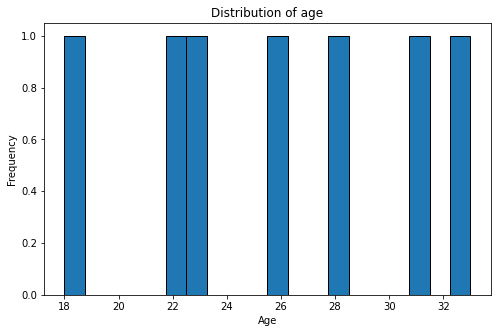

In [11]:
#analyze the age distribution: 

plt.figure(figsize=(8,5))
plt.hist(df['Age'],bins=20,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

# from below graph we can see that the age distribution is uniform in the dataset, age is ranging between 18 to 33.
#age is not repeating as they are in one count only. 

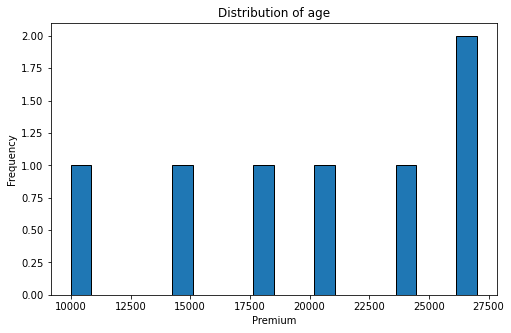

In [13]:
#analyze the premium distribution: 

plt.figure(figsize=(8,5))
plt.hist(df['Premium'],bins=20,edgecolor='black')
plt.xlabel('Premium')
plt.ylabel('Frequency')
plt.title('Distribution of age')
plt.show()

#from below graph we can see that the premiums are mostly evenly distributed, except for premium 27000, which appears twice. 

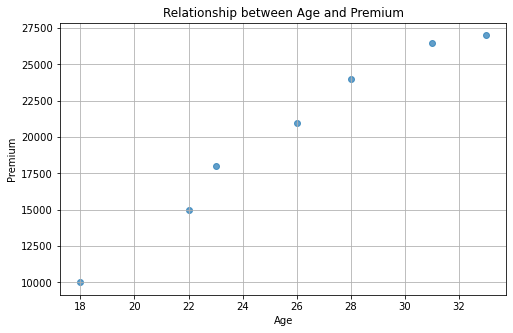

In [15]:
#now lest analyze the relationship between age and premium

plt.figure(figsize=(8,5))
plt.scatter(df['Age'],df['Premium'], alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Premium')
plt.title('Relationship between Age and Premium')
plt.grid(True)
plt.show()

<h2> Split data into Train and Test

In [16]:
X=df.drop('Premium',axis=1)
X

,Age
0,18
1,22
2,23
3,26
4,28
5,31
6,33


In [17]:
y=df['Premium']
y

0    10000
1    15000
2    18000
3    21000
4    24000
5    26500
6    27000
Name: Premium, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


In [24]:
y_test

3    21000
2    18000
5    26500
Name: Premium, dtype: int64

<h1> Linear Regression MOdel 

In [26]:
lr_model=LinearRegression()
lr_model

LinearRegression()

In [27]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred=lr_model.predict(X_test)

In [30]:
y_pred

array([19883.36520076, 16349.90439771, 25772.4665392 ])

In [31]:
print(y_test)
print(y_pred)

3    21000
2    18000
5    26500
Name: Premium, dtype: int64
[19883.36520076 16349.90439771 25772.4665392 ]


<h2> Model Evaluation : 

In [35]:
#importing libraries 
from sklearn.metrics import r2_score

In [36]:
r2_scr=r2_score(y_test,y_pred)
r2_scr

0.8789508419328458

<h2> Visualize regression plt using Seaborn library

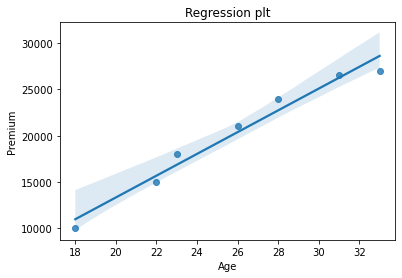

In [39]:
import seaborn as sns

plt.title("Regression plt")
sns.regplot(x=X, y=y)
plt.show()